**Сборный проект: прогнозирование потенциально популярного продукта в интернет-магазине "Стримчик"**

**Описание проекта**

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

**Цель проекта:**

Нам необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных**

| <!-- -->  | <!-- -->  |
|----------|:---------|
| Name | название игры |
| Platform | платформа |
| Year_of_Release | год выпуска |
| Genre | жанр игры |
| NA_sales | продажи в Северной Америке (миллионы проданных копий) |
| EU_sales | продажи в Европе (миллионы проданных копий) |
| JP_sales | продажи в Японии (миллионы проданных копий) |
| Other_sales | продажи в других странах (миллионы проданных копий) |
| Critic_Score | оценка критиков (максимум 100) |
| User_Score | оценка пользователей (максимум 10) |
| Rating | рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. |


**Рейтинг рассчитывается следующим образом:**

| <!-- -->  | <!-- -->  |
|----------|:---------|
|EC («Early childhood») | «Для детей младшего возраста».|
|E («Everyone») | «Для всех».|
|E10+ («Everyone 10 and older») | «Для всех старше 10 лет».|
|T («Teen») | «Подросткам 13–19 лет».|
|M («Mature») | «От 17 лет».|
|AO («Adults Only 18+») | «Только для взрослых».|
|RP ( «Rating Pending») | «Рейтинг ожидается».|
|K-A: Для детей | для тех, кто уже научился говорить и держать джойстик, эти игры уже могут вызывать интерес |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Исходя из полученных данных, можно сделать вывод, что столбец `User_Score` имеет тип данных `object`, хотя должен иметь численный. Разберемся, что на это влияет

In [4]:
data.columns = [x.lower() for x in data.columns]

In [5]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце `User_score` замечено значение `tbd`. 

Аббервиатура `tbd` означает, что игра еще не оценена достаточным количеством пользователей. Расшифровывается с ангилийского `to be defined`

In [6]:
data[data['user_score']=='tbd']['user_score'].count() / len(data['name'])*100

14.501944361352079

В столбце имеется оценка `tbd` не описанная в полученных данных, при этом ее значение больше 14%. Игнорировать это нельзя обозначим как `-2`

In [7]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = -2
data['user_score'].value_counts() 

-2     2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.6       2
0.2       2
0.7       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [8]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Работа с пропусками**

Пропуски могли возникнуть по многим причинам, например: невелся опрос с оценкой игры, игра не популярна и ее никто не оценивал, техничская ошибка и прочее

In [9]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Заметим, что в столбцах `name` и `genre` всего по два пропуска. Посмотрим на них

In [10]:
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Исходя из этих данных можно сделать вывод, что от этих строк можно изавиться, так как в них слишком много пропусков, а отсутствие двух строк сильно не повлияет на выборку.

In [11]:
print(len(data))
data.dropna(subset=['name'], inplace=True)
print(len(data))

16715
16713


Теперь рассмотрим столбец `year_of_release`. Как было замечено ранее в нем 269 пропусков.

In [12]:
data['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

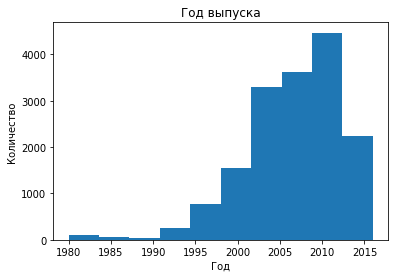

In [13]:
plt.hist(data['year_of_release'])
plt.title('Год выпуска')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

Так как в основном игры выпускались в последние годы, то логичнее заполнить пропуски медианой

</font><font color='Blue'><b>Комментарий студента</b></font><br>
Удаляем пропуски в столбце `year_of_release`

In [15]:
data.dropna(subset=['year_of_release'], inplace=True)
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Заменим тип данных в столбце `year_of_release` на `int`

In [16]:
data['year_of_release'] = data['year_of_release'].astype('int')

Теперь рассмотрим столбец `critic_score`. Как было замечено ранее в нем 8578 пропусков.

Пропусков в `critic_score` слишком много, поэтому заменим их на `-1`

In [17]:
data['critic_score'] = data['critic_score'].fillna(-1)

In [18]:
data['critic_score'].describe()

count    16444.000000
mean        32.979871
std         36.302947
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         70.000000
max         98.000000
Name: critic_score, dtype: float64

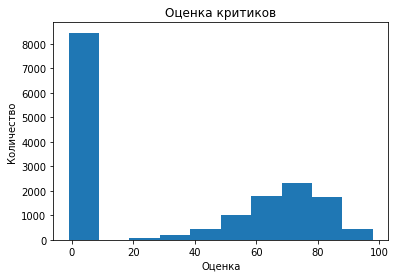

In [19]:
plt.hist(data['critic_score'])
plt.title('Оценка критиков')
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.show()

Также можно заметить, что оценки критиков - это целые числа, поэтому поменяем тип данных с `float` на `int`

In [20]:
data['critic_score'] = data['critic_score'].astype('int')

Теперь рассмотрим столбец `user_score`. Как было замечено ранее в нем 9125 пропусков.

Так как столбец `user_score` имеет тип данных `object`, поэтому заменим его на тип данных `float`

In [21]:
data['user_score'] = data['user_score'].astype('float')
data['user_score'].describe()

count    9839.000000
mean        4.922431
std         4.118644
min        -2.000000
25%         2.400000
50%         6.900000
75%         8.000000
max         9.700000
Name: user_score, dtype: float64

Количество пропусков в столбце `user_score` очень велико, поэтому пометим их как `-1`

In [22]:
data['user_score'] = data['user_score'].fillna(-1)

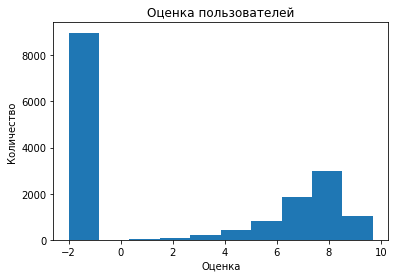

In [23]:
plt.hist(data['user_score'])
plt.title('Оценка пользователей')
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.show()

Теперь рассмотрим столбец `rating`. Как было замечено ранее в нем 6766 пропусков.

In [24]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [25]:
data['rating'].describe()

count     9768
unique       8
top          E
freq      3921
Name: rating, dtype: object

Заменим пропуски в столбце `rating` на значение `undefined`

In [26]:
data['rating'] = data['rating'].fillna('undefined')

In [27]:
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [28]:
data.shape

(16444, 11)

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [29]:
data['total_sales'] = data.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,undefined,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,-1.0,undefined,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,-1.0,undefined,28.31


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB


In [67]:
print(data.shape)
data.duplicated().count()

(16444, 12)


16444

Явных дубликатов не обнаружено

In [68]:
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

**Исследовательский анализ**

- ***Посмотрим сколько игр выпускалось в разные годы***

In [69]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales'],
      dtype='object')

In [70]:
data['year_of_release'].value_counts().count()

37

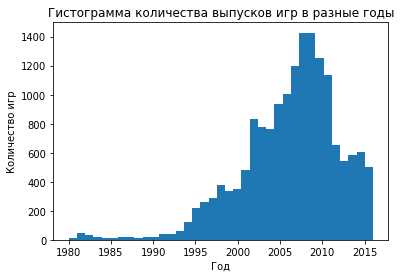

In [71]:
plt.hist(data['year_of_release'], bins=37)
plt.title('Гистограмма количества выпусков игр в разные годы')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

Исходя из этой гистограммы можно сделать вывод, что большая часть игр выпускалась в 2008-2009 годах. Дальше продажи пошли на спад. Если смотреть на начало графика, то можно увидеть, что игры стали покупать в большом количестве в 2000-х, поэтому информация за 1980 - 1999 годы не важна. 

- ***Рассмотрим, как менялись продажи по платформам.***


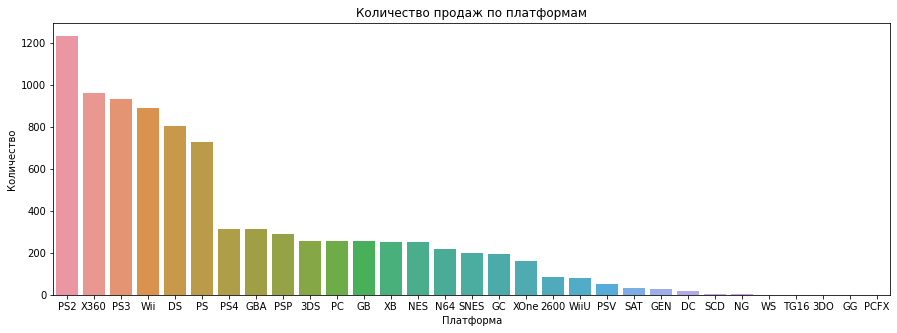

In [72]:
platform_sales = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
platform_sales = platform_sales.sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(15, 5))
sns.barplot(x=platform_sales.index, y='total_sales', data=platform_sales.reset_index())
plt.title('Количество продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество')
plt.show()

Из графика можно заметить, что большое количество игр покупали у платформ `PS2`, `X360`, `PS3`, `Wii`, `DS`, `PS`. Далее заметен резкий спад продаж у других платформ.

Построим распределение по годам у этих платформ.

In [73]:
best_platform_sales = platform_sales.reset_index()['platform'][:6].to_list()
best_platform_sales

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

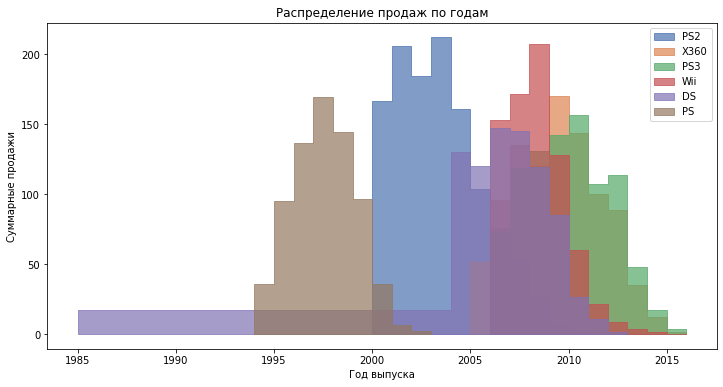

In [74]:
colors = sns.color_palette("deep", n_colors=len(best_platform_sales))
fig, ax = plt.subplots(figsize=(12, 6))
for i, platform in enumerate(best_platform_sales):
    platform_sales = (
        data.query(f'platform == "{platform}" and year_of_release > -1')
        .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
        .sort_index(ascending=False)

    )
    platform_sales_values = platform_sales.values.flatten()
    plt.fill_between(platform_sales.index, platform_sales_values, step="post", color=colors[i], alpha=0.7, label=platform)

plt.title('Распределение продаж по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.legend()
plt.show()

Исходя из этого графика можно заметить, что выбивается платформа `DS`

In [75]:
data.query('platform == "DS" and year_of_release < 2000')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1,-1.0,undefined,0.02


Можем заметить, что здесь всего одна строка, поэтому от нее можно спокойно избавиться

In [76]:
data = data.drop(index=15957)

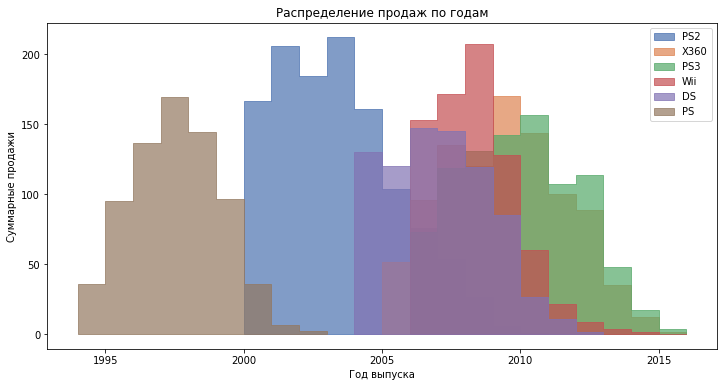

In [77]:
colors = sns.color_palette("deep", n_colors=len(best_platform_sales))
fig, ax = plt.subplots(figsize=(12, 6))
for i, platform in enumerate(best_platform_sales):
    platform_sales = (
        data.query(f'platform == "{platform}" and year_of_release > -1')
        .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
        .sort_index(ascending=False)

    )
    platform_sales_values = platform_sales.values.flatten()
    plt.fill_between(platform_sales.index, platform_sales_values, step="post", color=colors[i], alpha=0.7, label=platform)

plt.title('Распределение продаж по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.legend()
plt.show()

Выясним за какой характерный срок появляются новые и исчезают старые платформы.

In [78]:
life_cycle = data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max'])
life_cycle.columns = ['min', 'max']
life_cycle

,min,max
platform,,
2600,1980,1989
3DO,1994,1995
3DS,2011,2016
DC,1998,2008
DS,2004,2013
GB,1988,2001
GBA,2000,2007
GC,2001,2007
GEN,1990,1994


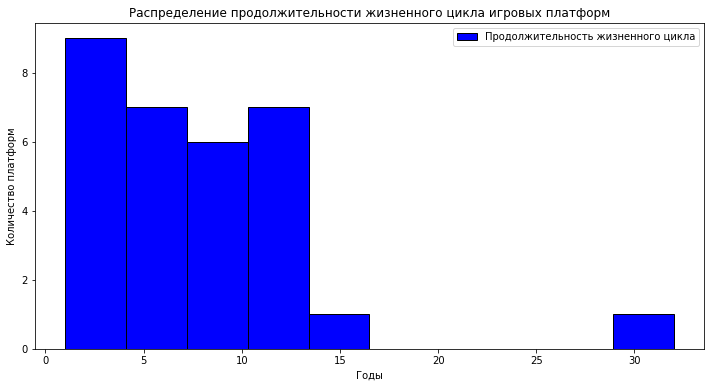

In [79]:
fig, ax = plt.subplots(figsize=(12, 6))
life_cycle['life_cycle'] = life_cycle['max'] - life_cycle['min'] + 1
ax.hist(life_cycle['life_cycle'], color='blue', edgecolor='black')

ax.legend(['Продолжительность жизненного цикла'])
ax.set_title('Распределение продолжительности жизненного цикла игровых платформ')
ax.set_xlabel('Годы')
ax.set_ylabel('Количество платформ')
plt.show()

In [80]:
life_cycle['life_cycle'].median()

7.0

Таким образом можно сделать вывод, что жизненный цикл игровых платформ составляет в среднем 7 лет.

- ***Исследование перспективных платформ***

Теперь определимся с актуальным периодом. Логичнее выбирать период, когда продажи по платформам растут или находятся на пике.

In [81]:
np.ceil(life_cycle['life_cycle'].median()/2)

4.0

Таким образом, для построения прогноза на 2017 год, актуальным периодом будет: 4 года

In [82]:
actual_period_data = data.query('year_of_release >= 2012')
actual_period_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,undefined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,undefined,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


Определим какие платформы лидируют по продажам, растут или падают.

In [83]:
(
    actual_period_data
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
)

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


Исходя из этих данных можно сделать вывод, что по продажам лидируют платформы `PS4`, `PS3`, `X360`. Теперь рассмотрим как у платформ распределены продажи по годам

In [84]:
actual_platforms = (
    actual_period_data
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False).reset_index()['platform'].to_list()
)
actual_platforms

['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii', 'DS', 'PSP']

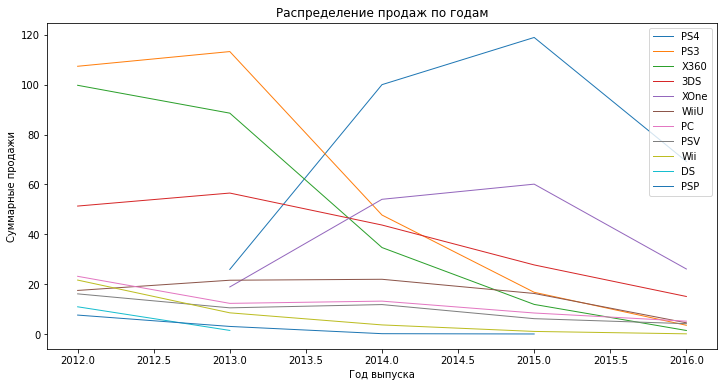

In [85]:
plt.subplots(figsize=(12, 6))
for i, platform in enumerate(actual_platforms):
    platform_sales = (
        actual_period_data.query(f'platform == "{platform}"')
        .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
        .sort_index(ascending=False)

    )
    platform_sales_values = platform_sales.values.flatten()
    plt.plot(platform_sales.index, platform_sales_values, linewidth=1, label=platform)

plt.title('Распределение продаж по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.legend()
plt.show()

Исходя из данных графика можно сделать вывод, что у всех платформ продажи к 2016 году падают, однако у `PS4` и `XOne` продажи выше остальных.

- ***Теперь построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.***

In [86]:
actual_period_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,undefined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,undefined,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


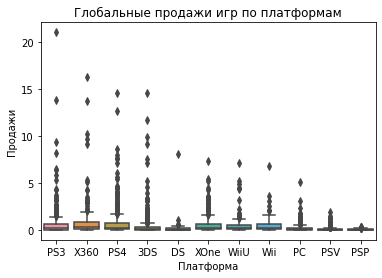

In [87]:
sns.boxplot(data=actual_period_data, x='platform', y='total_sales')
plt.title('Глобальные продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

In [88]:
temp = actual_period_data.copy()

In [90]:
temp1, temp2 = actual_period_data.total_sales.sum(), temp.total_sales.sum()
temp1, temp2, round((temp2-temp1)/temp2*100, 2)

(1446.5300000000002, 1446.5300000000002, 0.0)

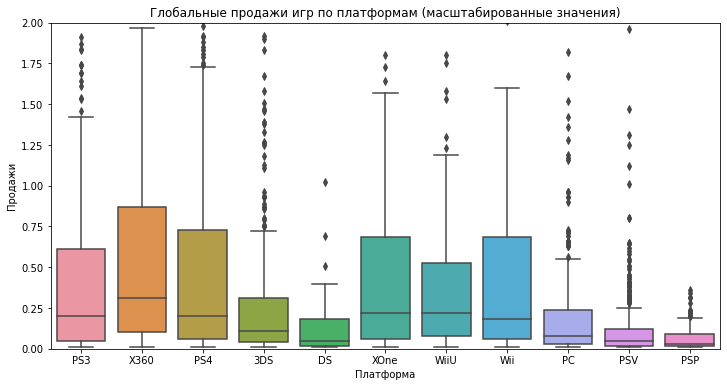

In [92]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=actual_period_data, whis=1.5)
plt.title('Глобальные продажи игр по платформам (масштабированные значения)')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.ylim(0, 2)
plt.show()

In [93]:
platform_stats = actual_period_data.groupby('platform')['total_sales'].agg(['median', 'std'])
platform_stats = platform_stats.sort_values(by='median', ascending=False)
platform_stats


,median,std
platform,,
X360,0.31,1.712069
WiiU,0.22,1.058836
XOne,0.22,1.036139
PS4,0.20,1.609456
PS3,0.20,1.462855
Wii,0.18,1.165447
3DS,0.11,1.387161
PC,0.08,0.494640
DS,0.05,1.439245


- Разные платформы демонстрируют различные диапазоны и распределения глобальных продаж игр. 

- Разные платформы демонстрируют различные диапазоны и распределения глобальных продаж игр. Некоторые платформы, такие как `X360` и `WiiU`, имеют более высокие медианные продажи, но большой разброс значений, то есть могут быть более рискованными, но также могут иметь больший потенциал для роста.

- Наличие выбросов указывает на то, что есть некоторые игры, которые показали очень высокие или низкие продажи по сравнению с типичными значениями для их платформы.


- ***Рассмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.***

Для начала необходимо определиться с популярными платформами

In [94]:
actual_period_data = data.query('year_of_release >= 2012')
actual_period_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,undefined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,undefined,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


In [95]:
popular_platforms = (
    actual_period_data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False).reset_index()['platform'].to_list()[:5]
)
popular_platforms

['PS4', 'PS3', 'X360', '3DS', 'XOne']

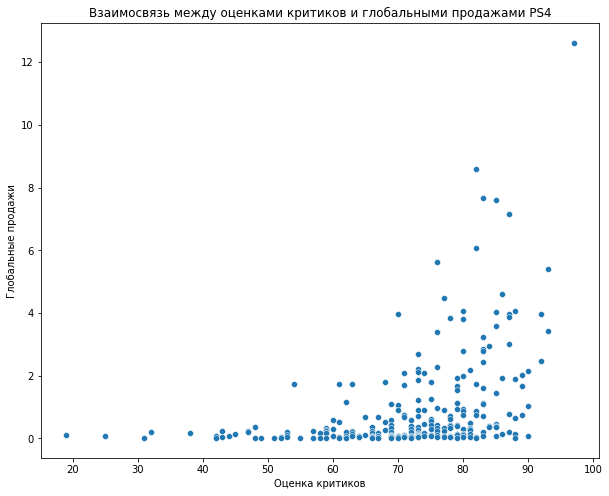

Корреляция между оценкой критиков и продажами на PS4: 0.41


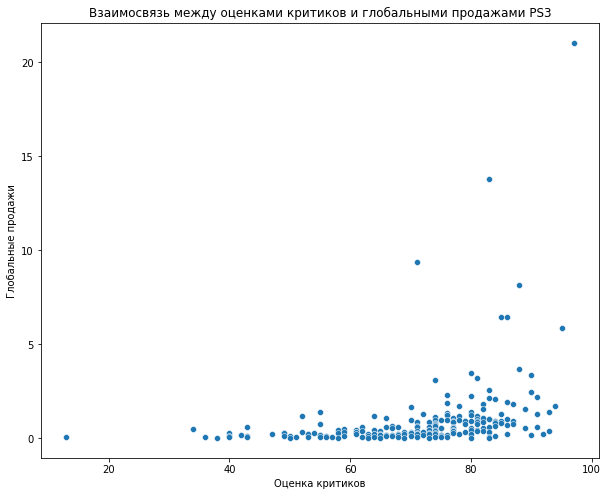

Корреляция между оценкой критиков и продажами на PS3: 0.33


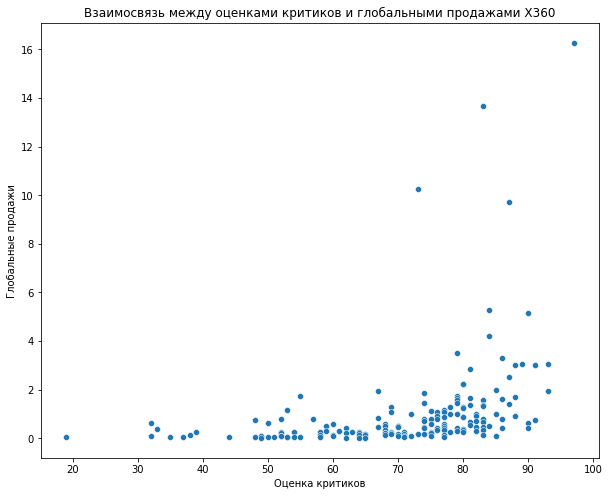

Корреляция между оценкой критиков и продажами на X360: 0.36


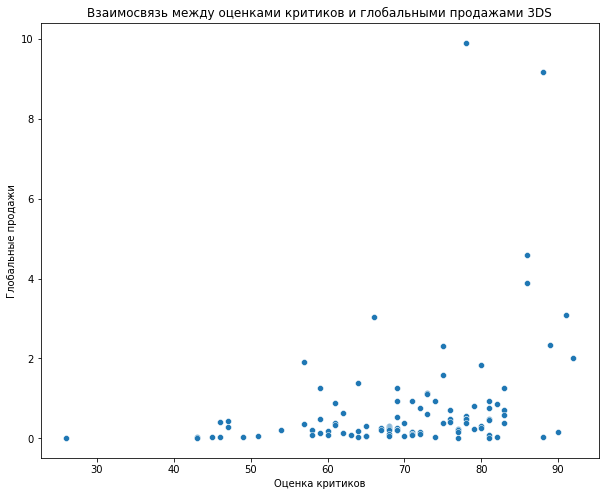

Корреляция между оценкой критиков и продажами на 3DS: 0.32


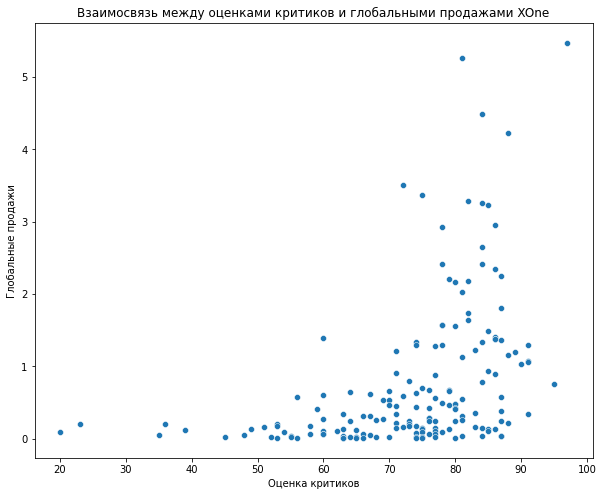

Корреляция между оценкой критиков и продажами на XOne: 0.42


In [97]:
for platform in popular_platforms:
    plt.figure(figsize=(10, 8))
    platform_data = actual_period_data[actual_period_data['platform'] == platform]
    platform_data = platform_data[platform_data['critic_score'] > -1]
    
    sns.scatterplot(x='critic_score', y='total_sales', data=platform_data)
    plt.xlabel('Оценка критиков')
    plt.ylabel('Глобальные продажи')
    plt.title(f'Взаимосвязь между оценками критиков и глобальными продажами {platform}')
    plt.show()

    
    critic_corr = platform_data['critic_score'].corr(platform_data['total_sales'])
    

    
    print(f"Корреляция между оценкой критиков и продажами на {platform}: {critic_corr:.2f}")
    

    

<Figure size 720x576 with 0 Axes>

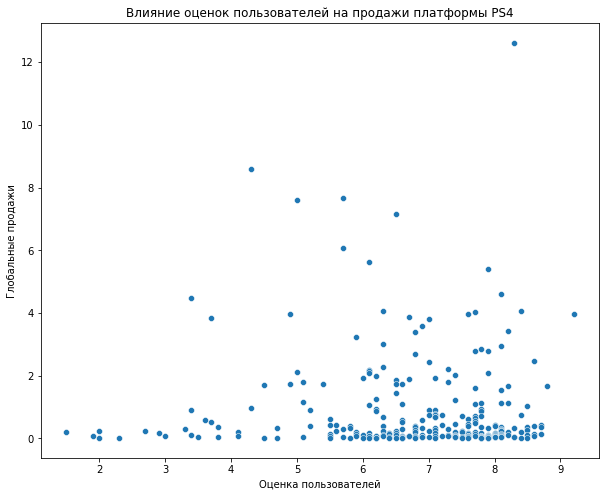

Корреляция между оценкой пользователей и продажами на PS4: -0.03


<Figure size 720x576 with 0 Axes>

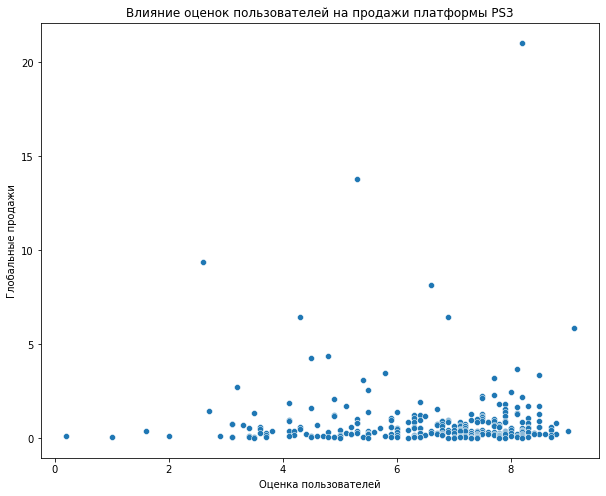

Корреляция между оценкой пользователей и продажами на PS3: -0.01


<Figure size 720x576 with 0 Axes>

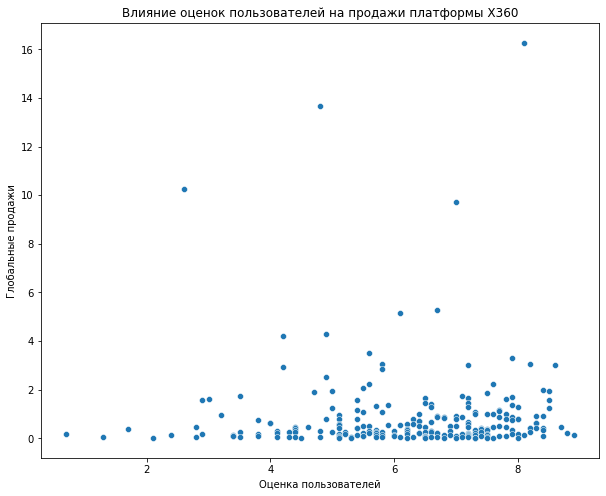

Корреляция между оценкой пользователей и продажами на X360: 0.01


<Figure size 720x576 with 0 Axes>

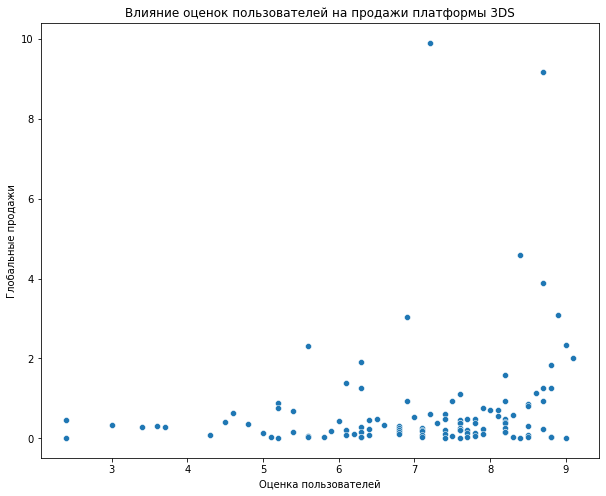

Корреляция между оценкой пользователей и продажами на 3DS: 0.20


<Figure size 720x576 with 0 Axes>

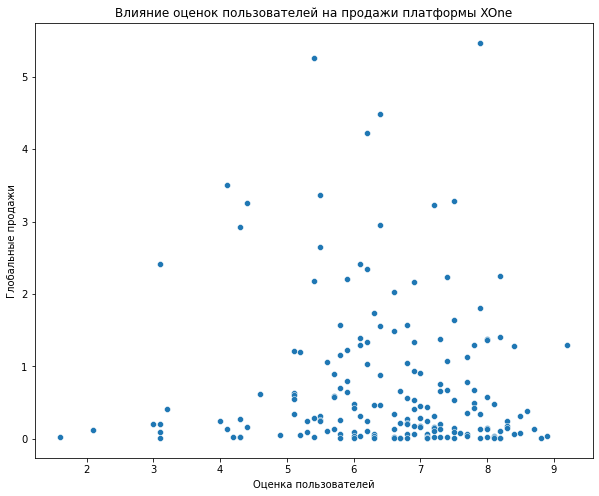

Корреляция между оценкой пользователей и продажами на XOne: -0.07


In [98]:
for platform in popular_platforms:
    plt.figure(figsize=(10, 8))
    platform_data = actual_period_data[actual_period_data['platform'] == platform]
    platform_data = platform_data[platform_data['user_score'] > -1]
    
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='user_score', y='total_sales', data=platform_data)
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Глобальные продажи')
    plt.title(f'Влияние оценок пользователей на продажи платформы {platform}')
    plt.show()
    
    user_corr = platform_data['user_score'].corr(platform_data['total_sales'])
    
    print(f"Корреляция между оценкой пользователей и продажами на {platform}: {user_corr:.2f}")

Исходя из построенных графиков, можно сделать следующие выводы:
- На платформе `PS4` наблюдается умеренная положительная корреляция между оценками критиков и продажами. Это означает, что игры с более высокими оценками критиков, как правило, продаются лучше. Корреляция между оценкой пользователей и продажами на `PS4` наблюдается слабая отрицательная. Это может говорить о том, что отзывы пользователей не оказывают значительного влияния на продажи игр на этой платформе.
- На платформах `X360`, `3DS`, `XOne` наблюдается слабая корреляция между оценками критиков и продажами, а также пользователей и продажами. Это означает, что отзывы критиков и пользователей не оказывают значительного влияния на продажи игр на этой платформе. 

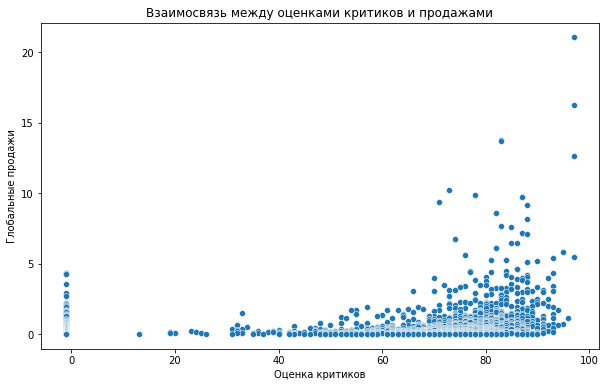

In [100]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=actual_period_data.query('user_score > -1'))
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи')
plt.title('Взаимосвязь между оценками критиков и продажами')
plt.show()

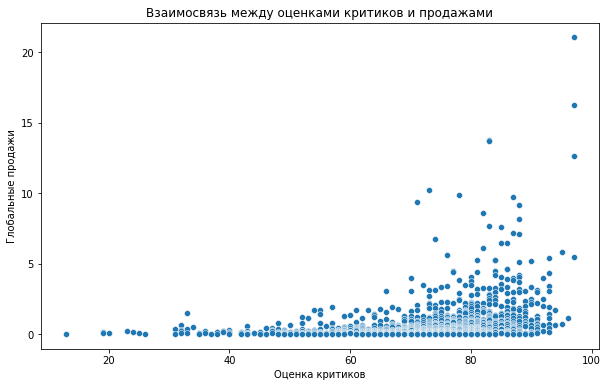

In [101]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=actual_period_data.query('critic_score > -1'))
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи')
plt.title('Взаимосвязь между оценками критиков и продажами')
plt.show()

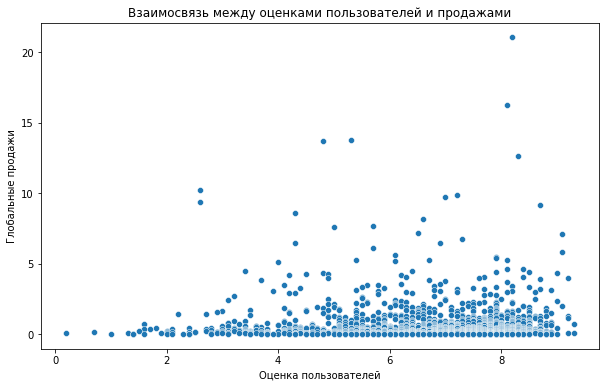

In [102]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_score', y='total_sales', data=actual_period_data.query('user_score > -1'))
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи')
plt.title('Взаимосвязь между оценками пользователей и продажами')
plt.show()

In [103]:
actual_period_data.query('user_score > -1')['user_score'].corr(actual_period_data['total_sales'])

0.0044288176754932575

Таким образом, общая корреляция между оценками пользователей и продажами составила 0.04, что говорит нам о том, что связь между этими двумя факторами очень слабая.

In [104]:
actual_period_data.query('critic_score > -1')['critic_score'].corr(actual_period_data['total_sales'])

0.3081967459207781

Общая корреляция между оценками критиков и продажами 0.3 говорит нам о том, что связь между этими двумя факторами умеренная и положительная.

Это означает, что существует умеренная тенденция к тому, что игры с более высокими оценками критиков продаются лучше. То есть, чем выше оценка критиков, тем больше вероятность того, что игра будет иметь хорошие продажи.
Однако, эта связь не является очень сильной. Это означает, что есть много других факторов, которые также влияют на продажи игр, помимо оценок критиков.

- ***Теперь рассмотрим общее распределение игр по жанрам.***

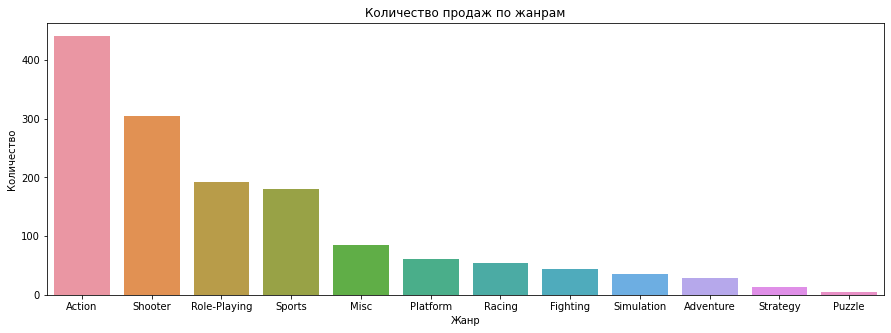

In [105]:
genre_sales = actual_period_data.pivot_table(index='genre', values='total_sales', aggfunc='sum')
genre_sales = genre_sales.sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(15, 5))
sns.barplot(x=genre_sales.index, y='total_sales', data=genre_sales.reset_index())
plt.title('Количество продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество')
plt.show()

Исходя из этой гистограммы можно сделать выводы:
- Доминирование экшена и шутеров: Жанры `Action` и `Shooter` явно лидируют по продажам, составляя почти 75% от общего объема продаж. Это говорит о том, что игры в этих жанрах пользуются огромной популярностью у геймеров.
- Популярность RPG и спортивных игр: Жанры `Role-Playing` и `Sports` также показывают значительные продажи, занимая третье и четвертое места. Это подтверждает, что RPG и спортивные игры - это стабильно популярные категории.
- Низкая популярность некоторых жанров: Жанры `Misc`, `Platform`, `Racing`, `Fighting`, `Simulation`, `Adventure`, `Strategy` и `Puzzle` имеют значительно меньшие продажи. Это может быть связано с тем, что эти жанры менее популярны у широкой аудитории или имеют более узкую целевую аудиторию.

</font><font color='Blue'><b>Комментарий студента</b></font><br>
Добавление сравнения медианных продаж. Проиллюстрируем их диаграммами размаха.

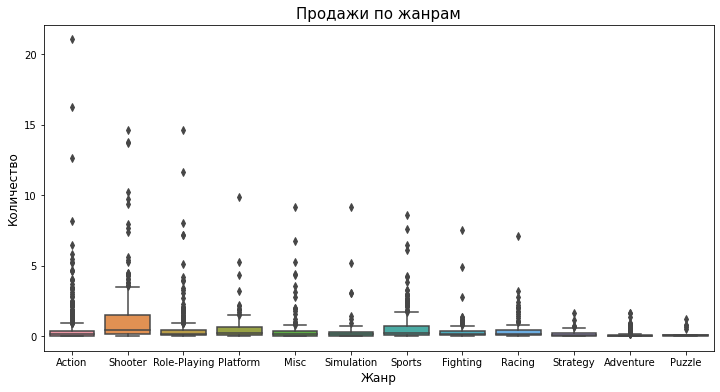

In [106]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=actual_period_data, x='genre', y='total_sales')
plt.title('Продажи по жанрам', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Количество',fontsize=12)
plt.show()

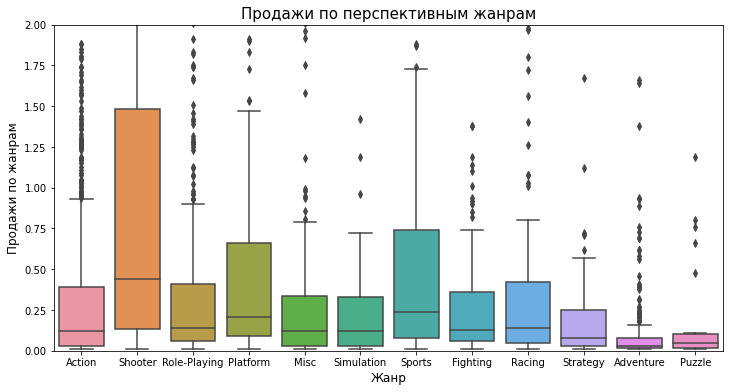

In [107]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=actual_period_data, x='genre', y='total_sales')
plt.title('Продажи по перспективным жанрам', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Продажи по жанрам',fontsize=12)
plt.ylim(0, 2)
plt.show()

Анализ продаж за последние четыре года показывает, что жанры `Action` и `Shooter` пользуются наибольшим спросом. Однако, углубленное исследование и сравнение медианных значений продаж по жанрам выявило, что жанры `Shooter` и `Sports` демонстрируют более стабильную прибыльность, что делает их более привлекательными для инвестирования.

**Вывод**

- Большая часть игр выпускалась в 2008-2009 годах. Дальше продажи пошли на спад. Если смотреть на начало графика, то можно увидеть, что игры стали покупать в большом количестве в 2000-х, поэтому информация за 1980 - 1999 годы не важна.
- Большое количество игр покупали у платформ PS2, X360, PS3, Wii, DS, PS. Далее заметен резкий спад продаж у других платформ
- Жизненный цикл игровых платформ составляет в среднем 7 лет.
- Выяснили, что актуальным периодом для прогноза будет 4 года
- Выяснили, что по продажам лидируют платформы PS4, PS3, X360. 
- У всех платформ продажи к 2016 году падают, однако у PS4 и XOne продажи выше остальных.
- Разные платформы демонстрируют различные диапазоны и распределения глобальных продаж игр.
- Разные платформы демонстрируют различные диапазоны и распределения глобальных продаж игр. Некоторые платформы, такие как X360 и WiiU, имеют более высокие медианные продажи, но большой разброс значений, то есть могут быть более рискованными, но также могут иметь больший потенциал для роста.
- Наличие выбросов указывает на то, что есть некоторые игры, которые показали очень высокие или низкие продажи по сравнению с типичными значениями для их платформы.
- На платформе PS4 наблюдается умеренная положительная корреляция между оценками критиков и продажами. Это означает, что игры с более высокими оценками критиков, как правило, продаются лучше. Корреляция между оценкой пользователей и продажами на PS4 наблюдается слабая отрицательная. Это может говорить о том, что отзывы пользователей не оказывают значительного влияния на продажи игр на этой платформе.
- На платформах X360, 3DS, XOne наблюдается слабая корреляция между оценками критиков и продажами, а также пользователей и продажами. Это означает, что отзывы критиков и пользователей не оказывают значительного влияния на продажи игр на этой платформе.
- Общая корреляция между оценками пользователей и продажами составила 0.04, что говорит нам о том, что связь между этими двумя факторами очень слабая.
- Общая корреляция между оценками критиков и продажами 0.3 говорит нам о том, что связь между этими двумя факторами умеренная и положительная.
- Это означает, что существует умеренная тенденция к тому, что игры с более высокими оценками критиков продаются лучше. То есть, чем выше оценка критиков, тем больше вероятность того, что игра будет иметь хорошие продажи. Однако, эта связь не является очень сильной. Это означает, что есть много других факторов, которые также влияют на продажи игр, помимо оценок критиков.
- Анализ продаж за последние четыре года показывает, что жанры `Action` и `Shooter` пользуются наибольшим спросом. Однако, углубленное исследование и сравнение медианных значений продаж по жанрам выявило, что жанры `Shooter` и `Sports` демонстрируют более стабильную прибыльность, что делает их более привлекательными для инвестирования.

**Портрет пользователя каждого региона**

In [108]:
actual_period_data


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,undefined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,undefined,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,undefined,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,undefined,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,undefined,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,undefined,0.01


In [109]:
sales_data = actual_period_data

# Анализ платформ
def analyze_platforms(sales, region):
    """Анализирует популярность платформ."""
    platform_sales = sales.groupby('platform').sum()
    top_platforms = platform_sales.sort_values(by=region, ascending=False).head(5)
    print("Топ-5 платформ по продажам:")
    return top_platforms

# Анализ жанров
def analyze_genres(sales, region):
    """Анализирует популярность жанров в заданном регионе."""
    genre_sales = sales.groupby('genre').sum()
    top_genres = genre_sales.sort_values(by=region, ascending=False).head(5)
    print(f"Топ-5 жанров в {region}:")
    return top_genres

# Анализ влияния рейтинга ESRB
def analyze_esrb(sales, region):
    """Анализирует влияние рейтинга ESRB на продажи в заданном регионе."""
    esrb_sales = sales.groupby('rating')[region].sum()
    print(f"Продажи по рейтингу ESRB в {region}:")
    return esrb_sales




**Самые популярные платформы в Северной Америке (NA)**

In [110]:
top_platform_na = analyze_platforms(sales_data, 'na_sales')
top_platform_na


Топ-5 платформ по продажам:


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
platform,,,,,,,,
X360,587862,140.05,74.52,1.57,20.40,11998,1393.9,236.54
PS4,789937,108.74,141.09,15.96,48.35,18027,1593.3,314.14
PS3,992629,103.38,106.86,35.29,43.26,15036,1612.8,288.79
XOne,497693,93.12,51.59,0.34,14.27,12314,1110.9,159.32
3DS,797445,55.31,42.64,87.79,8.87,6969,490.8,194.61


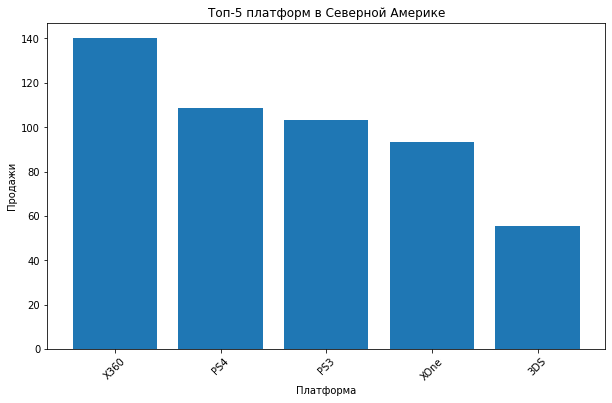

In [111]:
top_platforms = sales_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False)

top_platforms = top_platforms.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_platforms.index, top_platforms)
plt.title(f"Топ-5 платформ в Северной Америке")
plt.xlabel("Платформа")
plt.ylabel("Продажи")
plt.xticks(rotation=45)
plt.show()

**Самые популярные платформы в Европе (EU)**

In [112]:
top_platform_eu = analyze_platforms(sales_data, 'eu_sales')
top_platform_eu

Топ-5 платформ по продажам:


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
platform,,,,,,,,
PS4,789937,108.74,141.09,15.96,48.35,18027,1593.3,314.14
PS3,992629,103.38,106.86,35.29,43.26,15036,1612.8,288.79
X360,587862,140.05,74.52,1.57,20.40,11998,1393.9,236.54
XOne,497693,93.12,51.59,0.34,14.27,12314,1110.9,159.32
3DS,797445,55.31,42.64,87.79,8.87,6969,490.8,194.61


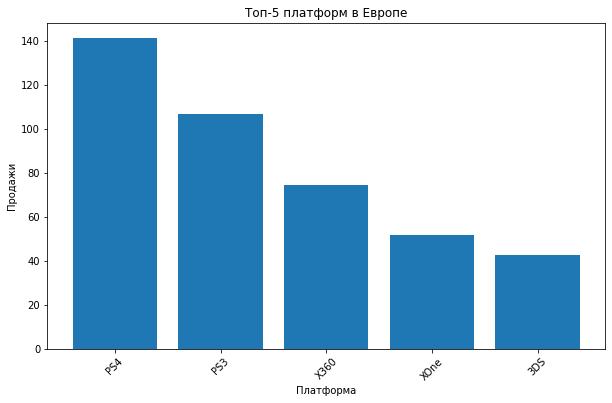

In [113]:
top_platforms = sales_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)

top_platforms = top_platforms.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_platforms.index, top_platforms)
plt.title(f"Топ-5 платформ в Европе")
plt.xlabel("Платформа")
plt.ylabel("Продажи")
plt.xticks(rotation=45)
plt.show()

**Самые популярные платформы в Японии (JP)**

In [114]:
top_platform_jp = analyze_platforms(sales_data, 'jp_sales')
top_platform_jp

Топ-5 платформ по продажам:


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
platform,,,,,,,,
3DS,797445,55.31,42.64,87.79,8.87,6969,490.8,194.61
PS3,992629,103.38,106.86,35.29,43.26,15036,1612.8,288.79
PSV,827865,10.98,11.36,21.04,5.80,7328,675.3,49.18
PS4,789937,108.74,141.09,15.96,48.35,18027,1593.3,314.14
WiiU,296008,38.10,25.13,13.01,5.95,6309,638.4,82.19


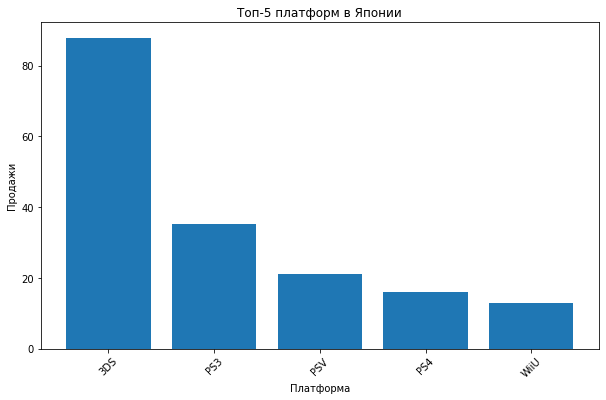

In [115]:
top_platforms = sales_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

top_platforms = top_platforms.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_platforms.index, top_platforms)
plt.title(f"Топ-5 платформ в Японии")
plt.xlabel("Платформа")
plt.ylabel("Продажи")
plt.xticks(rotation=45)
plt.show()

Исходя из этих данных можно сделать вывод, что в Северной Америке большой популярностью пользуются платформы `X360`, `PS4`, `PS3`. В Европе первую тройку занимают те же платформы, только немного в другом порядке. В Японии первую позицию занимает платформа `3DS`, которая в Европе и Северной Америке занимала последнее место.

**Самые популярные жанры в Северной Америке**

In [116]:
top_genre_na = analyze_genres(sales_data, 'na_sales')
top_genre_na

Топ-5 жанров в na_sales:


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
genre,,,,,,,,
Action,2076366,177.84,159.34,52.80,51.14,30526,3013.5,441.12
Shooter,473263,144.77,113.47,9.23,37.26,12640,1208.0,304.73
Sports,539746,81.53,69.09,8.01,22.44,10299,971.9,181.07
Role-Playing,745139,64.00,48.53,65.44,14.83,11552,1042.2,192.80
Misc,386675,38.19,26.32,12.86,7.67,4015,320.9,85.04


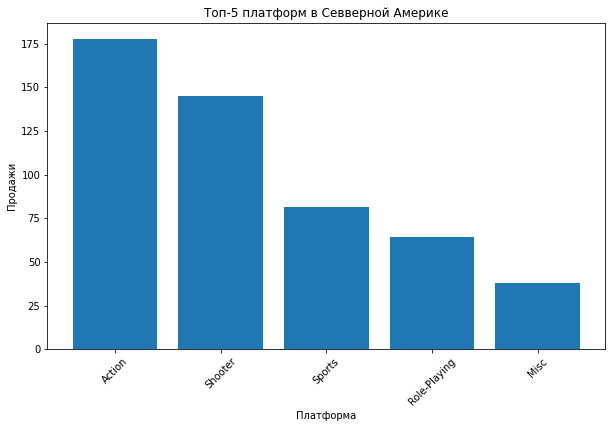

In [117]:
top_platforms = sales_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False)

top_platforms = top_platforms.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_platforms.index, top_platforms)
plt.title(f"Топ-5 платформ в Севверной Америке")
plt.xlabel("Платформа")
plt.ylabel("Продажи")
plt.xticks(rotation=45)
plt.show()

**Самые популярные жанры в Европе**

In [118]:
top_genre_eu = analyze_genres(sales_data, 'eu_sales')
top_genre_eu


Топ-5 жанров в eu_sales:


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
genre,,,,,,,,
Action,2076366,177.84,159.34,52.80,51.14,30526,3013.5,441.12
Shooter,473263,144.77,113.47,9.23,37.26,12640,1208.0,304.73
Sports,539746,81.53,69.09,8.01,22.44,10299,971.9,181.07
Role-Playing,745139,64.00,48.53,65.44,14.83,11552,1042.2,192.80
Racing,231600,17.22,27.29,2.50,6.49,5787,497.0,53.50


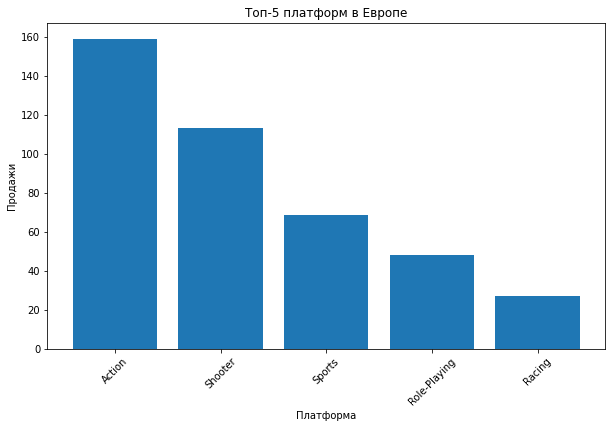

In [119]:
top_platforms = sales_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)

top_platforms = top_platforms.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_platforms.index, top_platforms)
plt.title(f"Топ-5 платформ в Европе")
plt.xlabel("Платформа")
plt.ylabel("Продажи")
plt.xticks(rotation=45)
plt.show()

**Самые популярные жанры в Японии**

In [120]:
top_genre_jp = analyze_genres(sales_data, 'jp_sales')
top_genre_jp


Топ-5 жанров в jp_sales:


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
genre,,,,,,,,
Role-Playing,745139,64.00,48.53,65.44,14.83,11552,1042.2,192.80
Action,2076366,177.84,159.34,52.80,51.14,30526,3013.5,441.12
Misc,386675,38.19,26.32,12.86,7.67,4015,320.9,85.04
Simulation,161117,7.97,14.55,10.41,2.19,2557,229.5,35.12
Fighting,219501,19.79,10.79,9.44,4.47,4461,440.7,44.49


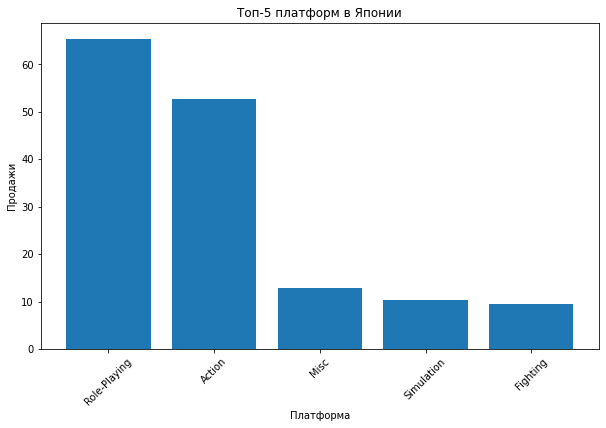

In [121]:
top_platforms = sales_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

top_platforms = top_platforms.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_platforms.index, top_platforms)
plt.title(f"Топ-5 платформ в Японии")
plt.xlabel("Платформа")
plt.ylabel("Продажи")
plt.xticks(rotation=45)
plt.show()

In [122]:
def process_region_sales(df, region_column):
    """
    Обрабатывает данные о продажах по жанрам в указанном регионе.

    Args:
        df (pd.DataFrame): DataFrame с данными о продажах.
        region_column (str): Название столбца с продажами региона.

    Returns:
        pd.DataFrame: DataFrame с агрегированными данными о продажах по жанрам.
    """

    region_sales = (
        df
        .pivot_table(index=['genre'], values=[region_column], aggfunc='sum')
        .sort_values(region_column, ascending=False)
        .reset_index()
    )

    region_sales.loc[5:, 'genre'] = 'Other'
    region_sales.loc[5, region_column] = region_sales.loc[5:, region_column].sum().round(2)
    region_sales = region_sales.iloc[0:6, :]

    return region_sales


na_sales = process_region_sales(actual_period_data, 'na_sales')
eu_sales = process_region_sales(actual_period_data, 'eu_sales')
jp_sales = process_region_sales(actual_period_data, 'jp_sales')
na_sales

,genre,na_sales
0,Action,177.84
1,Shooter,144.77
2,Sports,81.53
3,Role-Playing,64.00
4,Misc,38.19
5,Other,84.64


In [123]:
gs = pd.merge(na_sales, eu_sales, left_index=True, right_index=True)
gs = pd.merge(gs, jp_sales, left_index=True, right_index=True)
gs.rename(columns = {'genre_x':'na_genre', 'genre_y':'eu_genre', 'genre':'jp_genre'}, inplace = True )

gs

,na_genre,na_sales,eu_genre,eu_sales,jp_genre,jp_sales
0,Action,177.84,Action,159.34,Role-Playing,65.44
1,Shooter,144.77,Shooter,113.47,Action,52.80
2,Sports,81.53,Sports,69.09,Misc,12.86
3,Role-Playing,64.00,Role-Playing,48.53,Simulation,10.41
4,Misc,38.19,Racing,27.29,Fighting,9.44
5,Other,84.64,Other,89.10,Other,41.63


In [124]:
data = {'region': ['NA - Америка', 'EU - Европа', 'JP - Япония'], 'genre': ['na_genre', 'eu_genre', 'jp_genre'], 'sales': ['na_sales', 'eu_sales', 'jp_sales']} 
regions = pd.DataFrame(data) 
regions

,region,genre,sales
0,NA - Америка,na_genre,na_sales
1,EU - Европа,eu_genre,eu_sales
2,JP - Япония,jp_genre,jp_sales


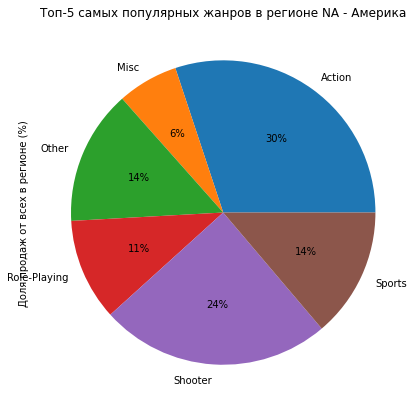

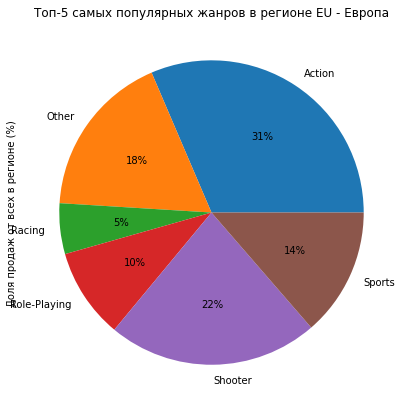

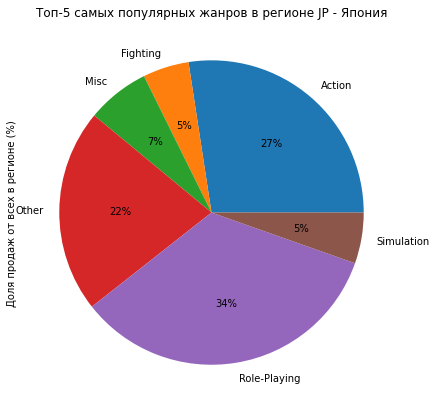

In [125]:
for i in regions.index :
    name = regions['region'][i]
    (gs.pivot_table(index=regions['genre'][i], values=regions['sales'][i], aggfunc='sum')
     .plot(kind='pie', y=regions['sales'][i], autopct='%1.0f%%', figsize=(7, 7), legend=False)
     .set(ylabel='Доля продаж от всех в регионе (%)')
    )
    plt.title(f'Топ-5 самых популярных жанров в регионе {name}')
    plt.show()

Исходя из полученных данных можно сделать вывод, что самые популярные жанры в Северной Америке и Европе почти совпадают, а именно: первые места занимают экшн, шутеры, спортивные и ролевые игры. Что касается Японии, то здесь первые места занимают ролевые и экшн игры.

**Влиение рейтинга ESRB в Северной Америке**

In [126]:
esrb_na = analyze_esrb(sales_data, 'na_sales')
esrb_na.sort_values(ascending=False)

Продажи по рейтингу ESRB в na_sales:


rating
M            231.57
E            114.37
undefined    103.31
E10+          75.70
T             66.02
Name: na_sales, dtype: float64

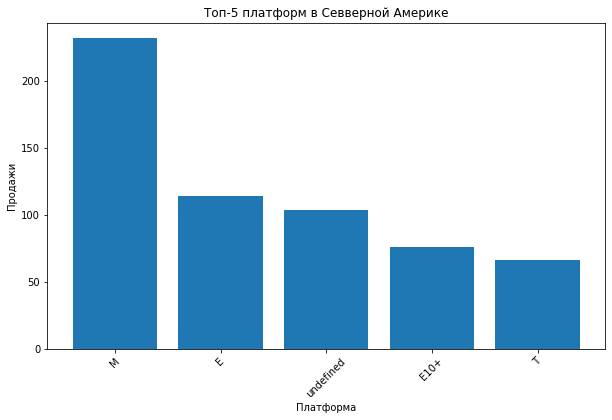

In [127]:
top_platforms = sales_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

top_platforms = top_platforms.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_platforms.index, top_platforms)
plt.title(f"Топ-5 платформ в Севверной Америке")
plt.xlabel("Платформа")
plt.ylabel("Продажи")
plt.xticks(rotation=45)
plt.show()

**Влиение рейтинга ESRB в Европе**

In [128]:
esrb_eu = analyze_esrb(sales_data, 'eu_sales')
esrb_eu.sort_values(ascending=False)

Продажи по рейтингу ESRB в eu_sales:


rating
M            193.96
E            113.03
undefined     91.50
E10+          55.37
T             52.96
Name: eu_sales, dtype: float64

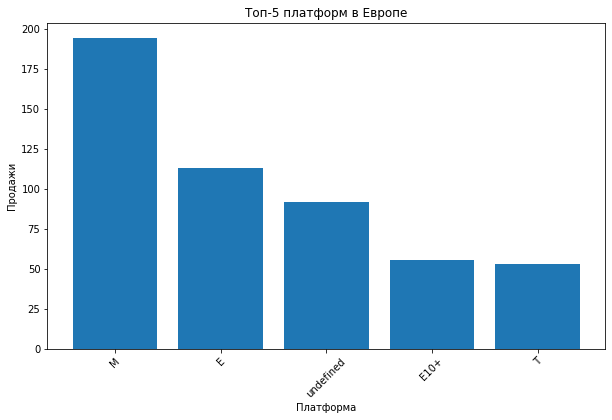

In [129]:
top_platforms = sales_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

top_platforms = top_platforms.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_platforms.index, top_platforms)
plt.title(f"Топ-5 платформ в Европе")
plt.xlabel("Платформа")
plt.ylabel("Продажи")
plt.xticks(rotation=45)
plt.show()

**Влиение рейтинга ESRB в Японии**

In [130]:
esrb_jp = analyze_esrb(sales_data, 'jp_sales')
esrb_jp.sort_values(ascending=False)


Продажи по рейтингу ESRB в jp_sales:


rating
undefined    108.84
E             28.33
T             26.02
M             21.20
E10+           8.19
Name: jp_sales, dtype: float64

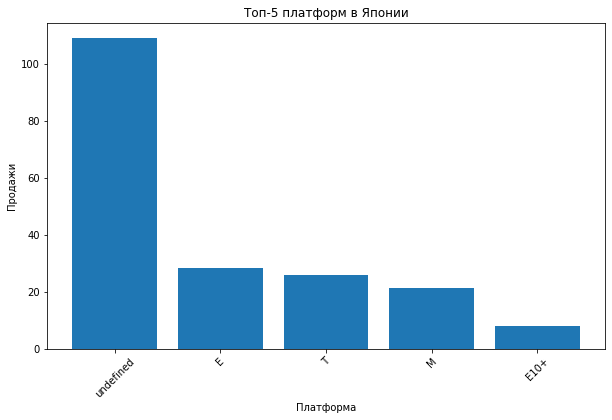

In [131]:
top_platforms = sales_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

top_platforms = top_platforms.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_platforms.index, top_platforms)
plt.title(f"Топ-5 платформ в Японии")
plt.xlabel("Платформа")
plt.ylabel("Продажи")
plt.xticks(rotation=45)
plt.show()

Исходя из этих данных можно сделать вывод, что в Северной Америке и Европе очень популярны игры с рейтингом `M`, что говорит о том, что большой популярностью пользуются игры для взрослых. Второе место занимают игры с рейтингом `E`, что говорит о значительном спросе на игры для всей семьи. Что касается Японии, то здесь первое место занимают игры с рейтингом `undefined`, что говорит нам о том, что японские стандарты классификации игр могут отличаться от ESRB.

**Вывод:**

- Исходя из данных можно сделать вывод, что в Северной Америке большой популярностью пользуются платформы X360, PS4, PS3. В Европе первую тройку занимают те же платформы, только немного в другом порядке. В Японии первую позицию занимает платформа 3DS, которая в Европе и Северной Америке занимала последнее место.
- Исходя из полученных данных можно сделать вывод, что самые популярные жанры в Северной Америке и Европе почти совпадают, а именно: первые места занимают экшн, шутеры, спортивные и ролевые игры. Что касается Японии, то здесь первые места занимают ролевые и экшн игры.
- Исходя из этих данных можно сделать вывод, что в Северной Америке и Европе очень популярны игры с рейтингом M, что говорит о том, что большой популярностью пользуются игры для взрослых. Второе место занимают игры с рейтингом E, что говорит о значительном спросе на игры для всей семьи. Что касается Японии, то здесь первое место занимают игры с рейтингом undefined, что говорит нам о том, что японские стандарты классификации игр могут отличаться от ESRB.

**Проверка гипотез**
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

    a) Формулировка гипотез:

- Нулевая гипотеза (H0): Средний пользовательский рейтинг Xbox One равен среднему пользовательскому рейтингу PC.
- Альтернативная гипотеза (H1): Средний пользовательский рейтинг Xbox One не равен среднему пользовательскому рейтингу PC.

    b) Выбор критерия:

- Критерий: t-критерий для двух выборок с независимыми наблюдениями.
- Обоснование: Мы сравниваем средние значения двух независимых групп (Xbox One и PC) с неизвестными дисперсиями.

    c) Пороговое значение alpha: alpha = 0.05 (стандартное значение для проверки гипотез).

In [132]:
xbox_one_ratings = sales_data[(sales_data['platform'] == 'XOne') & (sales_data['user_score'] > -1)]['user_score']
pc_ratings = sales_data[(sales_data['platform'] == 'PC') & (sales_data['user_score'] > -1)]['user_score']

t_statistic, p_value = st.ttest_ind(xbox_one_ratings, pc_ratings)

print(f"t-статистика: {t_statistic:.2f}")
print(f"p-значение: {p_value:.3f}")

alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги Xbox One и PC отличаются.")
else:
    print("Не отвергаем нулевую гипотезу: средние пользовательские рейтинги Xbox One и PC не отличаются.")

t-статистика: 0.59
p-значение: 0.554
Не отвергаем нулевую гипотезу: средние пользовательские рейтинги Xbox One и PC не отличаются.


На основании проведенного t-теста с пороговым значением alpha = 0.05, мы не отвергаем нулевую гипотезу. Это означает, что нет статистически значимых различий между средними пользовательскими рейтингами игр на платформах Xbox One и PC.

Полученные результаты указывают на то, что средние оценки пользователей для игр на Xbox One и PC вероятно, не отличаются друг от друга.

2. Средние пользовательские рейтинги жанров Action и Sports разные.

    a) Формулировка гипотез:

- Нулевая гипотеза (H0): Средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports.
- Альтернативная гипотеза (H1): Средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports.

    b) Выбор критерия:

- Критерий: t-критерий для двух выборок с независимыми наблюдениями.
- Обоснование: Мы сравниваем средние значения двух независимых групп (Action и Sports) с неизвестными дисперсиями.

    c) Пороговое значение alpha: alpha = 0.05 (стандартное значение для проверки гипотез).

In [133]:
action_ratings = sales_data[(sales_data['genre'] == 'Action') & (sales_data['user_score'] > -1)]['user_score']
sports_ratings = sales_data[(sales_data['genre'] == 'Sports') & (sales_data['user_score'] > -1)]['user_score']

t_statistic, p_value = st.ttest_ind(action_ratings, sports_ratings)

print(f"t-статистика: {t_statistic:.2f}")
print(f"p-значение: {p_value:.3f}")

alpha = 0.05 
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports отличаются.")
else:
    print("Не отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports не отличаются.")

t-статистика: 11.01
p-значение: 0.000
Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports отличаются.


На основании проведенного t-теста с пороговым значением alpha = 0.05, мы отвергаем нулевую гипотезу. Это означает, что существуют статистически значимые различия между средними пользовательскими рейтингами игр в жанрах Action и Sports.

Полученные результаты указывают на то, что средние оценки пользователей для игр в жанре Action значительно отличаются от средних оценок для игр в жанре Sports. Вероятность получить наблюдаемые различия, если бы нулевая гипотеза была верна, крайне мала

In [134]:
print(f"Средний рейтинг Xbox One: {xbox_one_ratings.mean():.2f}")
print(f"Средний рейтинг PC: {pc_ratings.mean():.2f}")

Средний рейтинг Xbox One: 6.52
Средний рейтинг PC: 6.43


In [135]:
print(f"Средний рейтинг Action: {action_ratings.mean():.2f}")
print(f"Средний рейтинг Sports: {sports_ratings.mean():.2f}")

Средний рейтинг Action: 6.83
Средний рейтинг Sports: 5.46


**Вывод:**

В процессе исследования данных о продажах игр, оценки пользователей и экспертов, жанрах и платформах, были отработаны принципы работы с данными по выявлению определяющих успешность игры закономерностях, выполнены следующие этапы и сделаны выводы:

1. **Изучили общую информацию о данных**

- Всего в таблице 16715 строк и 11 колонок в шести колонках имеются пропуски в данных
- Названия колонок имеют нарушение стилей
- Ряд колонок имеет неверный тип
- Данных достаточно для проведения исследования

2. **Предобработали данные**

- Явные дубликаты не обнаружены
- Удалены строки с неявными дубликатами поиск одновременно по `name`, `platform`, `year_of_release`
- По столбцу `name` удалены 2 строки с пропусками
- По столбцу `year_of_release` принято решение заменить строки с пропусками медианой
- В столбце `critic_score` количество пропусков достаточно большое, поэтому их обозначим как -1
- В столбце `user_score` количество пропусков достаточно большое, поэтому их обозначим как -1, неописанное значение tbd обозначено как -2
- В столбце `rating` пропуски обозначены как `undefined`
- Столбцы `year_of_release`, `critic_score` приведены к `int` типу, `user_score` к `float` в соответствии с данными содержащимися в них.
- Пропуски могли появиться из-за сбора данных из различных источников, которые не согласованы между собой.
- Посчитали суммарные продажи во всех регионах записали в total_sales

3. **Провели исследовательский анализ данных**

- Большая часть игр выпускалась в 2008-2009 годах. Дальше продажи пошли на спад. Если смотреть на начало графика, то можно увидеть, что игры стали покупать в большом количестве в 2000-х, поэтому информация за 1980 - 1999 годы не важна.
- Большое количество игр покупали у платформ PS2, X360, PS3, Wii, DS, PS. Далее заметен резкий спад продаж у других платформ
- Жизненный цикл игровых платформ составляет в среднем 7 лет.
- Выяснили, что актуальным периодом для прогноза будет 4 года
- Выяснили, что по продажам лидируют платформы PS4, PS3, X360. 
- У всех платформ продажи к 2016 году падают, однако у PS4 и XOne продажи выше остальных.
- Разные платформы демонстрируют различные диапазоны и распределения глобальных продаж игр.
- Разные платформы демонстрируют различные диапазоны и распределения глобальных продаж игр. Некоторые платформы, такие как X360 и WiiU, имеют более высокие медианные продажи, но большой разброс значений, то есть могут быть более рискованными, но также могут иметь больший потенциал для роста.
- Наличие выбросов указывает на то, что есть некоторые игры, которые показали очень высокие или низкие продажи по сравнению с типичными значениями для их платформы.
- На платформе PS4 наблюдается умеренная положительная корреляция между оценками критиков и продажами. Это означает, что игры с более высокими оценками критиков, как правило, продаются лучше. Корреляция между оценкой пользователей и продажами на PS4 наблюдается слабая отрицательная. Это может говорить о том, что отзывы пользователей не оказывают значительного влияния на продажи игр на этой платформе.
- На платформах X360, 3DS, XOne наблюдается слабая корреляция между оценками критиков и продажами, а также пользователей и продажами. Это означает, что отзывы критиков и пользователей не оказывают значительного влияния на продажи игр на этой платформе.
- Общая корреляция между оценками пользователей и продажами составила 0.04, что говорит нам о том, что связь между этими двумя факторами очень слабая.
- Общая корреляция между оценками критиков и продажами 0.3 говорит нам о том, что связь между этими двумя факторами умеренная и положительная.
- Это означает, что существует умеренная тенденция к тому, что игры с более высокими оценками критиков продаются лучше. То есть, чем выше оценка критиков, тем больше вероятность того, что игра будет иметь хорошие продажи. Однако, эта связь не является очень сильной. Это означает, что есть много других факторов, которые также влияют на продажи игр, помимо оценок критиков.
- Анализ продаж за последние четыре года показывает, что жанры `Action` и `Shooter` пользуются наибольшим спросом. Однако, углубленное исследование и сравнение медианных значений продаж по жанрам выявило, что жанры `Shooter` и `Sports` демонстрируют более стабильную прибыльность, что делает их более привлекательными для инвестирования.

4. **Портрет пользователя каждого региона**

- Исходя из данных можно сделать вывод, что в Северной Америке большой популярностью пользуются платформы X360, PS4, PS3. В Европе первую тройку занимают те же платформы, только немного в другом порядке. В Японии первую позицию занимает платформа 3DS, которая в Европе и Северной Америке занимала последнее место.
- Исходя из полученных данных можно сделать вывод, что самые популярные жанры в Северной Америке и Европе почти совпадают, а именно: первые места занимают экшн, шутеры, спортивные и ролевые игры. Что касается Японии, то здесь первые места занимают ролевые и экшн игры.
- Исходя из этих данных можно сделать вывод, что в Северной Америке и Европе очень популярны игры с рейтингом M, что говорит о том, что большой популярностью пользуются игры для взрослых. Второе место занимают игры с рейтингом E, что говорит о значительном спросе на игры для всей семьи. Что касается Японии, то здесь первое место занимают игры с рейтингом undefined, что говорит нам о том, что японские стандарты классификации игр могут отличаться от ESRB.

**Проверка гипотез**

- Нулевая гипотеза (H0): Средний пользовательский рейтинг Xbox One равен среднему пользовательскому рейтингу PC.

- Альтернативная гипотеза (H1): Средний пользовательский рейтинг Xbox One не равен среднему пользовательскому рейтингу PC.

На основании проведенного t-теста с пороговым значением alpha = 0.05, мы не отвергаем нулевую гипотезу. Это означает, что нет статистически значимых различий между средними пользовательскими рейтингами игр на платформах Xbox One и PC.

Полученные результаты указывают на то, что средние оценки пользователей для игр на Xbox One и PC вероятно, не отличаются друг от друга.


- Нулевая гипотеза (H0): Средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports.

- Альтернативная гипотеза (H1): Средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports.

На основании проведенного t-теста с пороговым значением alpha = 0.05, мы отвергаем нулевую гипотезу. Это означает, что существуют статистически значимые различия между средними пользовательскими рейтингами игр в жанрах Action и Sports.

Полученные результаты указывают на то, что средние оценки пользователей для игр в жанре Action значительно отличаются от средних оценок для игр в жанре Sports. Вероятность получить наблюдаемые различия, если бы нулевая гипотеза была верна, крайне мала

**Рекомендации:**

Исходя из полученных данных, для оптимизации рекламных расходов рекомендуется:

- Платформы:
    - PS4: Данная платформа демонстрирует наибольшие продажи и умеренную положительную корреляцию между оценками критиков и продажами.
    - XOne: Несмотря на меньшие продажи, чем у PS4, XOne демонстрирует стабильные продажи и средние пользовательские рейтинги, сопоставимые с PC.
- Жанры:
    - Shooter: Жанр демонстрирует стабильную прибыльность и высокую популярность в Северной Америке и Европе.
    - Sports: Жанр также демонстрирует стабильную прибыльность и высокую популярность в Северной Америке и Европе.
- Рейтинг ESRB:
    - M: Данный рейтинг пользуется наибольшей популярностью в Северной Америке и Европе.
- Регионы:
    - Северная Америка: Здесь наблюдается наибольший спрос на игры, особенно на платформы X360, PS4, PS3 и жанры Action, Shooter, Sports.
    - Европа: Популярны те же платформы и жанры, что и в Северной Америке.